In [82]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
eps_0 = 2.6 * 8.85e-12
Gamma = 2.6 * 3.12228e-10

In [94]:
model_dir = '../../bin/'

## Проверка сходимости по равномерной норме

In [160]:
model_m4 = model_from_file(model_dir + 'model_-4.csv')
model_m3 = model_from_file(model_dir + 'model_-3.csv')
model_m2 = model_from_file(model_dir + 'model_-2.csv')
model_m1 = model_from_file(model_dir + 'model_-1.csv')
model_0 = model_from_file(model_dir + 'model_0.csv')
model_1 = model_from_file(model_dir + 'model_1.csv')
model_2 = model_from_file(model_dir + 'model_2.csv')
model_3 = model_from_file(model_dir + 'model_3.csv')
model_4 = model_from_file(model_dir + 'model_4.csv')

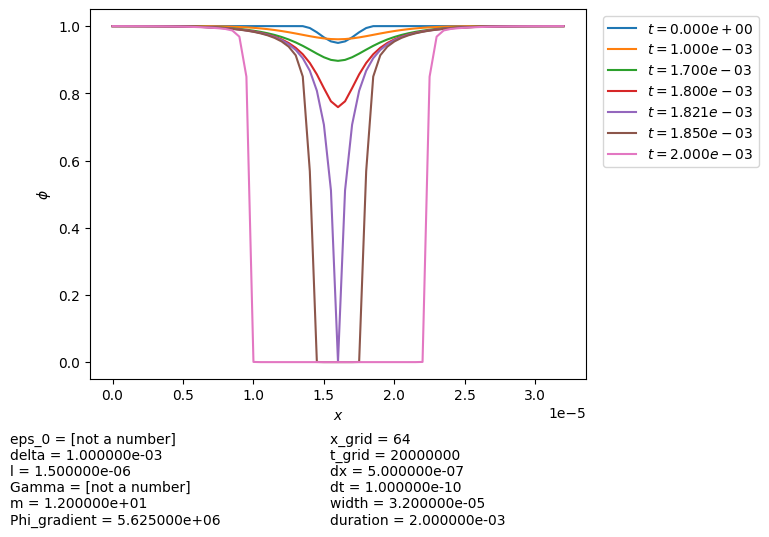

In [170]:
model_plot(model_0, [0, 1e-3, 1.7e-3, 1.8e-3, 1.821e-3, 1.85e-3, 2e-3])

In [162]:
model_0._t_iterations

array([  1, 512, 512, ..., 512, 512, 512])

In [163]:
def stability_limits(model):
    limit_delta = \
        0.25 / model.params['m'] * \
        model.params['delta']**(5/3) / \
        (model.params['Phi_gradient']**2 * eps_0)
    limit_h = \
        0.25 / model.params['m'] * \
        model.params['dx']**2 / Gamma
    return limit_delta, limit_h

In [171]:
limit_delta, limit_h = stability_limits(model_0)
limit_delta, limit_h

(2.861522007786915e-10, 6.415840758052218e-06)

In [165]:
def metric_uniform(model_first, model_second):
    return np.abs((model_first.df_phi - model_second.df_phi).to_numpy()).max()

In [166]:
models = [model_m4, model_m3, model_m2, model_m1, model_0, model_1, model_2, model_3, model_4]
dts = [model.params['dt'] for model in models]
norms = [metric_uniform(models[-1], model) for model in models]

In [167]:
norms

[np.float64(2.014830792),
 np.float64(9.158901675000001),
 np.float64(0.042729074000000006),
 np.float64(0.026186158999999987),
 np.float64(0.014748067000000004),
 np.float64(0.007567411999999996),
 np.float64(0.0034244259999999804),
 np.float64(0.0011754900000000013),
 np.float64(0.0)]

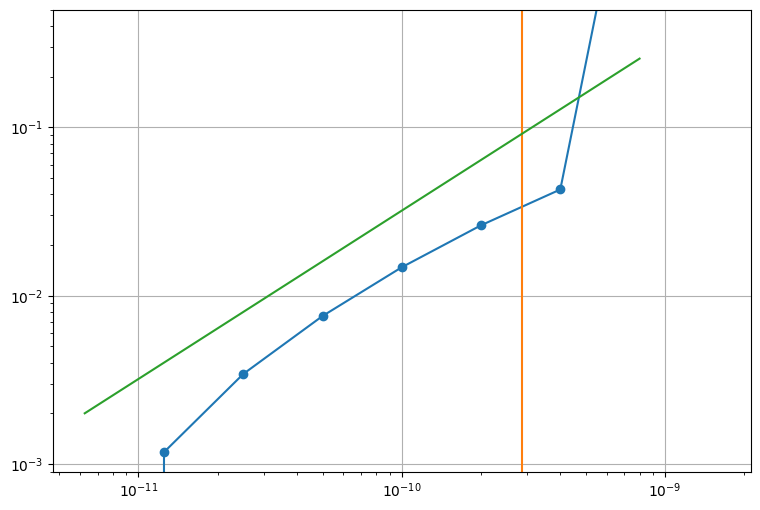

In [224]:
plt.figure(figsize=(9, 6))
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylim([9e-4, 5e-1])
plt.plot(dts, norms, '-o')
plt.plot([limit_delta, limit_delta], [8e-4, 1e1])
x_0, y_0 = models[-1].params['dt'], 2e-3
plt.plot([x_0, x_0 * 2**7], [y_0, y_0 * 2**7])
plt.show()

### Дальнейшее увеличение шага за счет адаптации

In [226]:
model_m3a = model_from_file(model_dir + 'model_-3a.csv')
model_m4a = model_from_file(model_dir + 'model_-4a.csv')
model_m5a = model_from_file(model_dir + 'model_-5a.csv')
model_m6a = model_from_file(model_dir + 'model_-6a.csv')
model_m7a = model_from_file(model_dir + 'model_-7a.csv')

In [256]:
models_adaptive = [model_m7a, model_m6a, model_m5a, model_m4a, model_m3a]
dts_adaptive = [model.params['dt_max'] for model in models_adaptive]
norms_adaptive = [metric_uniform(models[-1], model) for model in models_adaptive]

In [257]:
norms_adaptive

[np.float64(0.280335107355),
 np.float64(0.242556305355),
 np.float64(0.20316302748),
 np.float64(0.1540636727),
 np.float64(0.06026184299999998)]

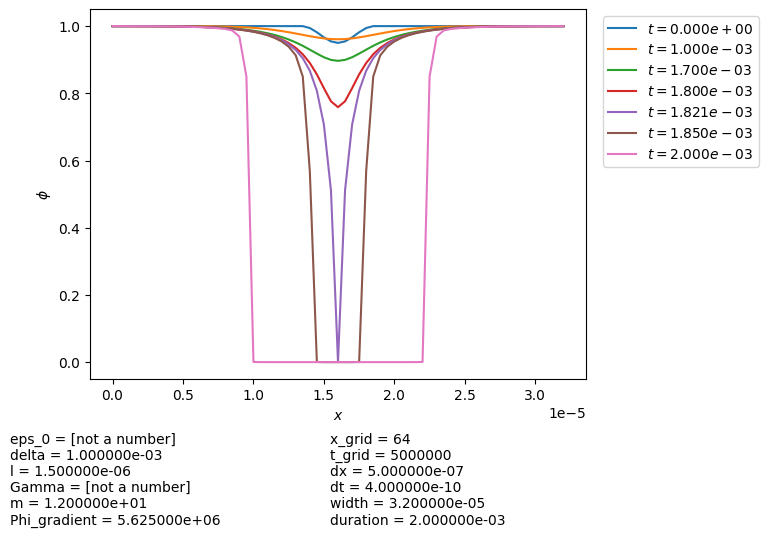

In [258]:
model_plot(model_m4a, [0, 1e-3, 1.7e-3, 1.8e-3, 1.821e-3, 1.85e-3, 2e-3])

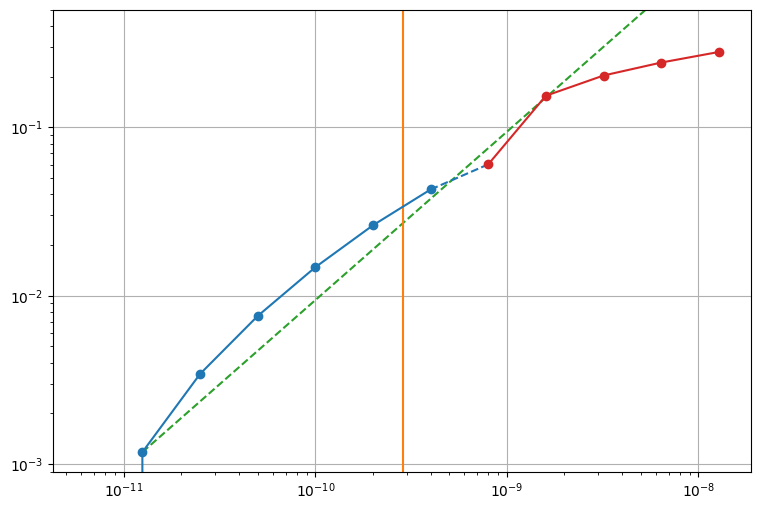

In [269]:
plt.figure(figsize=(9, 6))
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylim([9e-4, 5e-1])

x_0, y_0 = dts[-2], norms[-2]
plt.plot([x_0, x_0 * 2**10], [y_0, y_0 * 2**10], '--', color='C2')
plt.plot([limit_delta, limit_delta], [8e-4, 1e1], color='C1')

plt.plot([dts[2], dts_adaptive[-1]], [norms[2], norms_adaptive[-1]], '--', color='C0')
plt.plot(dts[2:], norms[2:], '-o')
plt.plot(dts_adaptive, norms_adaptive, '-o', color='C3')

plt.show()

## Падение отдельной точки

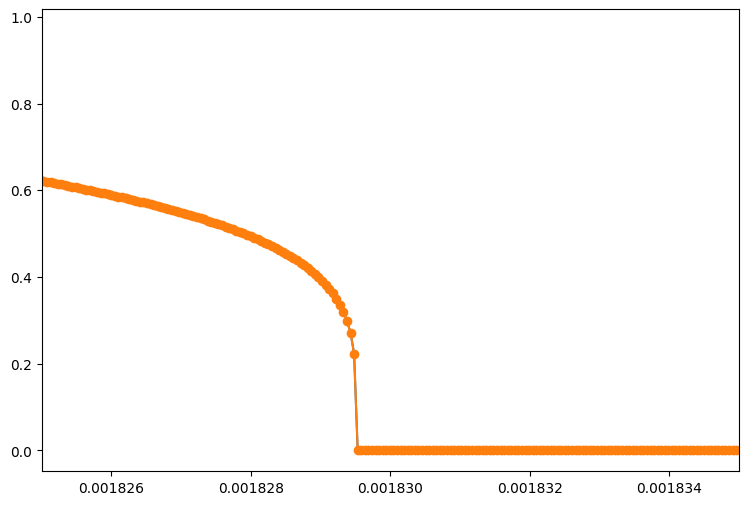

In [201]:
plt.figure(figsize=(9, 6))
plt.xlim([1.825e-3, 1.835e-3])
plt.plot(model_0.ts, model_0.df_phi[30])
plt.plot(model_4.ts, model_4.df_phi[30], '-o')
plt.show()

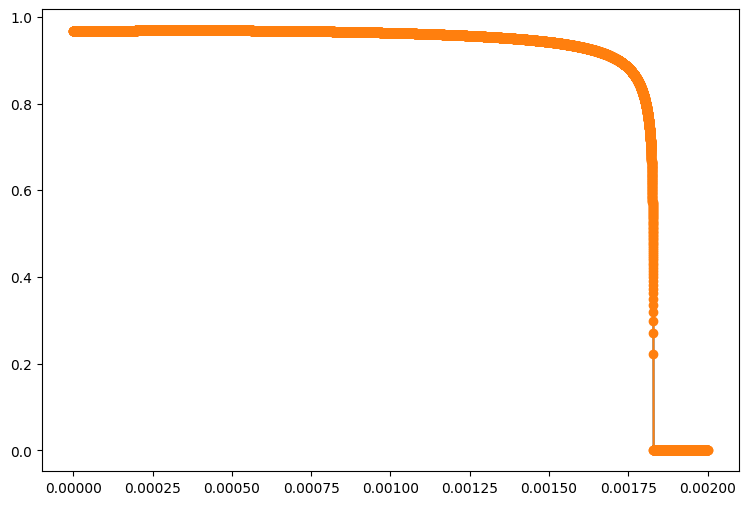

In [218]:
plt.figure(figsize=(9, 6))
#plt.xlim([1.825e-3, 1.835e-3])
plt.plot(model_0.ts, model_0.df_phi[30])
plt.plot(model_4.ts, model_4.df_phi[30], '-o')
plt.show()

In [219]:
def eps(phi):
    return 1 / (0.001 + 4 * phi**3 - 3 * phi**4)

In [220]:
phi = np.linspace(0, 1.1, 1000)
y = eps(phi)

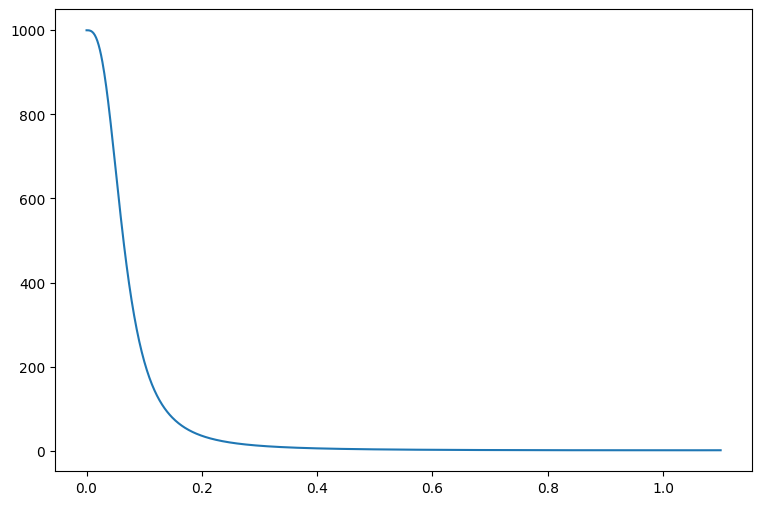

In [221]:
plt.figure(figsize=(9, 6))
plt.plot(phi, y)
plt.show()